In [1]:
import pandas as pd
import numpy as np
import DataLoad as data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
sessions_df = data.load_sessions_data()
users_df = data.load_users_data()

In [3]:
users_buys = []
users_visits = []
mad = []
mrd = []

for i in users_df['user_id']:
    users_buys.append(data.user_buys(i, sessions_df))
    users_visits.append(data.user_visits(i, sessions_df))
    mad.append(data.mean_accepted_discount(i, sessions_df))
    mrd.append(data.mean_rejected_discounts(i, sessions_df))
    
users_df['total_buys'] = users_buys
users_df['total_visits'] = users_visits
users_df['m_accepted_discounts'] = mad
users_df['m_rejected_discounts'] = mrd

Using K-Means to clustering

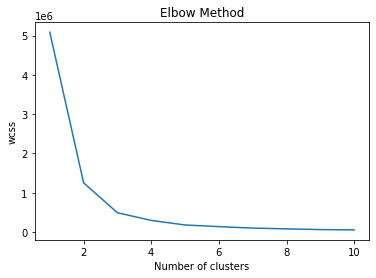

In [4]:
X = users_df[['total_buys', 'total_visits', 'm_accepted_discounts', 'm_rejected_discounts']].fillna(0)
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [5]:
km5 = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X)

In [6]:
y_means

array([4, 3, 0, 0, 2, 3, 0, 1, 2, 2, 3, 0, 1, 1, 4, 0, 2, 3, 1, 4, 0, 4,
       2, 1, 1, 4, 4, 4, 4, 2, 1, 1, 3, 4, 0, 1, 0, 1, 1, 1, 1, 4, 0, 3,
       3, 0, 0, 1, 1, 1, 0, 4, 1, 0, 4, 1, 3, 1, 0, 4, 3, 4, 1, 1, 2, 1,
       4, 0, 4, 0, 1, 2, 1, 0, 1, 1, 1, 4, 1, 2, 3, 0, 2, 0, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 4, 0, 2, 1, 1, 0, 3, 1, 3, 1, 2, 0, 1, 3, 4, 3,
       3, 2, 2, 0, 0, 3, 3, 0, 1, 4, 4, 1, 1, 1, 1, 0, 0, 2, 0, 3, 1, 3,
       2, 4, 3, 0, 0, 1, 1, 1, 2, 2, 3, 4, 3, 4, 4, 4, 2, 4, 1, 3, 0, 4,
       2, 2, 3, 3, 0, 3, 0, 4, 4, 1, 3, 4, 2, 2, 4, 3, 0, 2, 2, 0, 2, 2,
       1, 1, 0, 3, 2, 3, 2, 2, 0, 3, 3, 1, 3, 0, 3, 4, 2, 2, 2, 2, 3, 1,
       1, 0])